In [209]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [219]:
#json.load(open('data/world_bank_projects.json'))

In [212]:
df = pd.read_json('data/world_bank_projects.json')

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64


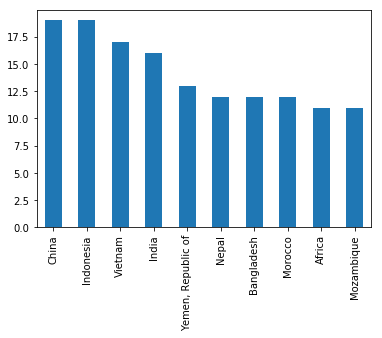

In [213]:
#Problem 1: find 10 countries with most projects
country = df.countryshortname
country_count = country.value_counts()[:10]
print(country_count)
country_count.plot(kind='bar')
plt.show()

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                           72 
Urban development                               47 
Name: name, dtype: int64


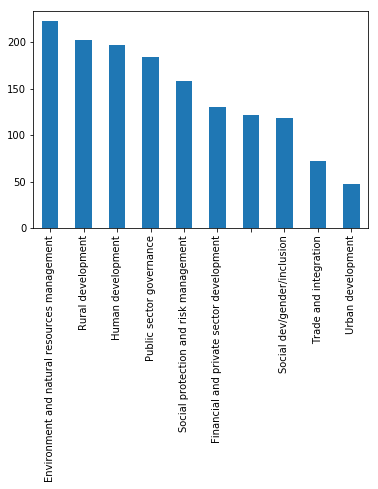

In [214]:
# Problme 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

from pandas.io.json import json_normalize
data=json.load(open('data/world_bank_projects.json'))
theme_data = json_normalize(data,'mjtheme_namecode')
theme_data_count = theme_data.name.value_counts()[:10]
print(theme_data_count)
theme_data_count.plot(kind='bar')
plt.show()

In [215]:
# Problem 3: n 2. above you will notice that some entries have only the code and the name is missing.
# Create a dataframe with the missing names filled in.

theme1 = theme_data.drop_duplicates()                        # Dropping duplicates
theme2 = theme1[~(theme1.name =='')]                         # Selecting non-empty strings
theme_dict = dict(zip(theme2['code'],theme2['name']))        # creating dictionary with code as keys and name as value
theme_dict = {int(k):v for k,v in theme_dict.items()}        # converting  string keys to integer

In [216]:
theme_dict

{1: 'Economic management',
 2: 'Public sector governance',
 3: 'Rule of law',
 4: 'Financial and private sector development',
 5: 'Trade and integration',
 6: 'Social protection and risk management',
 7: 'Social dev/gender/inclusion',
 8: 'Human development',
 9: 'Urban development',
 10: 'Rural development',
 11: 'Environment and natural resources management'}

In [217]:
theme_data['name'] = theme_data['name'].replace({'':np.nan}) # Replacing empty strings in name column to nan
theme_data['code'] = pd.to_numeric(theme_data['code'])       # converting 'code' column  from object datatype to numeric
theme_data['name']=theme_data['name'].fillna(theme_data['code'].map(theme_dict))   #fill nan values by mapping integer keys in code column to corresponding values in theme_dict
theme_data_count1 = theme_data.name.value_counts() 

In [218]:
theme_data

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


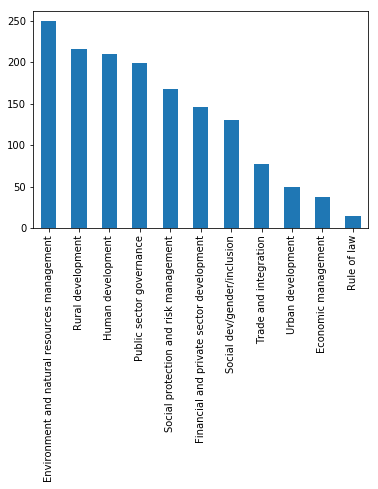

In [206]:
theme_data_count1.plot(kind='bar')
plt.show()